In [1]:
import pdfplumber
import re
import pandas as pd
from collections import defaultdict


In [ ]:

# Load the Excel file
path = "sheetMatrix.xlsx" #th if needed

# Read both sheetsµ
df1 = pd.read_excel(path, sheet_name="Feuil1").fillna(0)
df2 = pd.read_excel(path, sheet_name="Feuil2").fillna(0)
df1=df1.iloc[1:16, 5:]
df1.index = df1.iloc[:, 0].tolist()
df1=df1.iloc[:, 1:-1]

df2=df2.iloc[1:19, 2:-2]
df2.index = df2.iloc[:, 0].tolist()
df2=df2.iloc[:, 1:-1]
rows_to_remove = [2, 4, 8, 11, 13, 15]
df2 = df2.drop(df2.index[rows_to_remove])


main_categories = (
      ['UR']  * 5   # 5 UR seats
    + ['SC']  * 5   # 5 SC seats
    + ['ST']  * 5   # 5 ST seats
    + ['OBC'] * 5   # 5 OBC seats
    + ['MBC'] * 5   # 5 MBC seats
    + ['EWS'] * 5   # 5 EWS seats
    + ['PH']  * 5   # 2 PH seats (adjust if needed)
    # + ['NG'] 
)

main_categoriesDF2 = (
      ['UR']  * 5   # 5 UR seats
    + ['SC']  * 5   # 5 SC seats
    + ['ST']  * 5   # 5 ST seats
    + ['OBC'] * 5   # 5 OBC seats
    + ['MBC'] * 5   # 5 MBC seats
    + ['EWS'] * 5   # 5 EWS seats
    + ['PH']  * 4   # 2 PH seats (adjust if needed)
    + ['SP']
    + ['DC'] 
)

In [3]:
sub_categories = [
    'GE',
    'GE, WE',    # Women
    'WD',      # Regular
    'DV',      # Non-Gazetted / Non-TSP region
    'EX',      # Ex-serviceme
]


# 'TSP-UR',  # Tribal Sub-Plan - UR
#     'TSP-ST',  # Tribal Sub-Plan - ST

# -------------------------------
# Example: create all combinations (main × sub)
# -------------------------------
combined_categories = [f"{s}" for s in sub_categories]*7

print("Main categories:", len(main_categories))
print("Sub categories:", sub_categories)
print(f"Total combined = {len(combined_categories)}")
print(combined_categories)  # show first 20 combinations

Main categories: 35
Sub categories: ['GE', 'GE, WE', 'WD', 'DV', 'EX']
Total combined = 35
['GE', 'GE, WE', 'WD', 'DV', 'EX', 'GE', 'GE, WE', 'WD', 'DV', 'EX', 'GE', 'GE, WE', 'WD', 'DV', 'EX', 'GE', 'GE, WE', 'WD', 'DV', 'EX', 'GE', 'GE, WE', 'WD', 'DV', 'EX', 'GE', 'GE, WE', 'WD', 'DV', 'EX', 'GE', 'GE, WE', 'WD', 'DV', 'EX']


In [4]:
df1.columns = pd.MultiIndex.from_arrays([main_categories,combined_categories], names=['Category', 'SubCategory'])
df2.columns = pd.MultiIndex.from_arrays([main_categories,combined_categories], names=['Category', 'SubCategory'])

In [5]:
frames = [df1, df2]
seatMat = pd.concat(frames)

In [6]:
seatMat

Category     UR                   SC                  ... EWS                  \
SubCategory  GE GE, WE WD DV  EX  GE GE, WE WD DV EX  ...  GE GE, WE WD DV EX   
POST-1       16      5  2  0   1   7      1  0  1  0  ...   5      1  1  0  0   
POST-2       16      4  2  1   0   6      3  0  0  0  ...   5      0  1  0  0   
POST-3       33     10  4  1   2  14      4  2  0  1  ...   9      3  1  0  0   
POST-4       14      5  2  0   1   2      0  1  0  0  ...   3      2  0  0  0   
POST-5        1      0  0  0   0   1      0  0  0  0  ...   0      0  0  0  0   
POST-6        3      1  0  0   0   1      0  0  0  0  ...   0      0  0  0  0   
POST-7        2      1  0  0   0   1      0  0  0  0  ...   1      0  0  0  0   
POST-8        3      1  0  1   0   1      1  0  0  0  ...   1      0  0  0  0   
POST-9       15      5  2  0   1   9      4  1  0  0  ...   4      2  1  0  0   
POST-10       1      0  0  0   0   0      0  0  0  0  ...   0      0  0  0  0   
POST-11       1      0  0  0   0   2      0  0  0  0  ...   1      0  0  0  0   
POST-12      16      4  2  1   1   5      2  0  0  0  ...   5      1  0  0  0   
POST-13       5      2  0  0   1   1      1  0  0  0  ...   0      0  0  0  0   
POST-14       1      0  0  0   0   1      0  0  0  0  ...   0      0  0  0  0   
POST-15       2      0  0  0   0   0      0  0  0  0  ...   0      0  0  0  0   
POST-16       1      0  0  0   0   0      0  0  0  0  ...   0      0  0  0  0   
POST-17      60     18  7  2  10  22      5  3  1  3  ...  14      4  2  0  2   
POST-19      26      7  3  1   4  11      5  1  0  2  ...   7      3  1  0  1   
POST-21       1      0  0  0   0   0      0  0  0  0  ...   0      0  0  0  0   
POST-22       2      1  0  0   0   1      0  0  0  0  ...   1      0  0  0  0   
POST-23       3      1  0  0   0   7      2  0  0  1  ...   5      1  0  0  0   
POST-25      18      5  2  1   3   2      1  1  0  0  ...   4      1  0  0  0   
POST-26       0      1  0  0   0   1      0  0  0  0  ...   0      1  0  0  0   
POST-28       2      0  0  0   0   1      1  0  0  0  ...   1      0  0  0  0   
POST-30       5      1  1  0   0   1      1  0  0  0  ...   1      0  0  0  0   
POST-32       1      1  0  0   0   1      1  0  0  0  ...   0      0  0  0  0   
POST-33       3      0  1  0   0   3      1  0  0  0  ...   2      1  0  0  0   

Category    PH                  
SubCategory GE GE, WE WD DV EX  
POST-1       1      1  0  1  5  
POST-2       0      0  0  0  4  
POST-3       2      2  1  1  9  
POST-4       0      1  1  0  3  
POST-5       1      0  0  0  0  
POST-6       0      0  0  0  1  
POST-7       1      1  0  0  1  
POST-8       0      0  1  0  1  
POST-9       0      1  1  1  5  
POST-10      0      0  0  0  0  
POST-11      1      0  0  0  1  
POST-12      1      0  0  1  3  
POST-13      0      1  0  0  1  
POST-14      0      0  0  0  0  
POST-15      0      0  0  0  0  
POST-16      0      0  0  0  0  
POST-17      2      3  2  2  4  
POST-19      1      1  1  1  0  
POST-21      0      0  0  0  0  
POST-22      1      0  0  0  0  
POST-23      1      1  0  0  0  
POST-25      1      1  1  0  1  
POST-26      0      0  0  1  0  
POST-28      1      0  0  0  0  
POST-30      0      0  0  1  0  
POST-32      0      0  0  0  0  
POST-33      0      0  1  1  0  

[27 rows x 35 columns]

In [ ]:

PDF_PATH = "resultRAS2023.pdf"
OUT_XLSX = "WE_candidates_2col.xlsx"

# --- helpers ---
def group_words_into_lines(words, y_tolerance=3.0):
    """
    Group words (from pdfplumber.extract_words) into text lines by similar 'top' (y).
    Returns list of lines, each line is list of word dicts sorted by x0.
    """
    # bucket by y with tolerance
    rows = []
    for w in sorted(words, key=lambda d: (round(d["top"]/y_tolerance), d["x0"])):
        key = round(w["top"]/y_tolerance)
        if not rows or rows[-1][0] != key:
            rows.append([key, [w]])
        else:
            rows[-1][1].append(w)
    # sort words left-to-right and join
    lines = []
    for _, ws in rows:
        ws_sorted = sorted(ws, key=lambda d: d["x0"])
        lines.append(ws_sorted)
    return lines

def words_to_text(line_words):
    return " ".join(w["text"] for w in line_words)

_roll_re = re.compile(r"\b(\d{7})\b")
_cat_re  = re.compile(r"\b\d{7}\b(?:\s+\(P\))?\s+([A-Z, -]+?)\s*\(")  # category is UPPER and commas until first '('
_rank_all_paren_re = re.compile(r"\((\d+)\)")

def parse_entry(text):
    """
    Extract roll, category, rank from a single text chunk (one side/line entry).
    Returns dict or None.
    """
    # Roll number
    m_roll = _roll_re.search(text)
    if not m_roll:
        return None
    roll = m_roll.group(1)

    # Category: between roll and first '('
    m_cat = _cat_re.search(text)
    category = ""
    if m_cat:
        category = m_cat.group(1).strip().replace("  ", " ").replace(" ,", ",")

    # Rank: take the last (...) number on the line (some lines may include 2 numbers from formatting junk)
    ranks = _rank_all_paren_re.findall(text)
    if not ranks:
        return None
    rank = int(ranks[-1])

    return {"Roll No": roll, "Category": category, "Rank": rank, "Raw": text}

def split_two_columns(page):
    """
    Return (left_lines_text, right_lines_text).
    We use extract_words and split by page midpoint.
    """
    words = page.extract_words(use_text_flow=True, keep_blank_chars=False)
    if not words:
        return [], []

    mid_x = (page.bbox[2] - page.bbox[0]) / 2.0  # midpoint in page coords, relative to page origin
    left_words  = [w for w in words if w["x0"] < mid_x]
    right_words = [w for w in words if w["x0"] >= mid_x]

    left_lines  = group_words_into_lines(left_words)
    right_lines = group_words_into_lines(right_words)

    left_texts  = [words_to_text(lw) for lw in left_lines]
    right_texts = [words_to_text(lw) for lw in right_lines]
    return left_texts, right_texts

def extract_all_entries(pdf_path):
    entries = []
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            left_texts, right_texts = split_two_columns(page)
            for col_texts in (left_texts, right_texts):
                for line in col_texts:
                    # print("line: ", line)
                    # Lines often contain 2 side-by-side entries separated by big spaces; try to split smartly:
                    # If the line holds two entries, they’ll each have a 7-digit roll no. Split on that pattern.
                    # We find all segments that start at a roll no.
                    split_parts = []
                    # Find all roll no matches with indices to slice:
                    roll_iter = list(_roll_re.finditer(line))
                    if len(roll_iter) >= 2:
                        # cut at each roll occurrence
                        for i, m in enumerate(roll_iter):
                            start = m.start()
                            end = roll_iter[i+1].start() if i+1 < len(roll_iter) else len(line)
                            split_parts.append(line[start:end].strip())
                    else:
                        split_parts = [line]

                    for part in split_parts:
                        rec = parse_entry(part)
                        if rec:
                            entries.append(rec)
    # de-duplicate by (Roll No, Rank) in case of repeats
    uniq = {(e["Roll No"], e["Rank"]): e for e in entries}
    return list(uniq.values())

# --- main ---
all_entries = extract_all_entries(PDF_PATH)

df = pd.DataFrame(all_entries)
# guard: keep only rows where Category has 'WE' token (e.g., 'GE,WE', 'SC,WE,RG', etc.)
we_mask = (
    # df["Category"].str.contains(r"\bGE\b", na=False) &
    df["Category"].str.contains(r"\bWE\b", na=False)
    # df["Category"].str.contains(r"\bSC\b", na=False) 
)
df_we = df[we_mask].copy()

# clean category spaces/commas
df_we["Category"] = (
    df_we["Category"]
    .str.replace(r"\s+", " ", regex=True)
    .str.replace(r"\s*,\s*", ",", regex=True)
)

# WE with rank < 679 (ranked above 679)
df_we_lt_679 = df_we[df_we["Rank"] < 680].copy().sort_values("Rank")


# Summary
summary = pd.DataFrame({
    "Metric": ["Total WE (any rank)", "WE with rank < 679"],
    "Count": [len(df_we), len(df_we_lt_679)]
})

# with pd.ExcelWriter(OUT_XLSX, engine="openpyxl") as xw:
#     df_we_lt_679[["Roll No", "Category", "Rank"]].to_excel(xw, index=False, sheet_name="WE_lt_679")
#     df_we.sort_values("Rank")[["Roll No", "Category", "Rank"]].to_excel(xw, index=False, sheet_name="WE_all")
#     summary.to_excel(xw, index=False, sheet_name="Summary")

# print(f"✅ Extracted {len(df_we_lt_679)} WE entries with rank < 679")
# print(f"📄 Total WE entries found: {len(df_we)}")
# print(f"💾 Excel written to: {OUT_XLSX}")


In [8]:
df_we_lt_679.tail(n=10)

,Roll No,Category,Rank,Raw
1405,1109160,"GE,WE",624,"1109160 GE,WE (624)"
86,1100055,"GE,WE",643,"1100055 GE,WE (643)"
1832,1115645,"GE,WE",644,"1115645 GE,WE (644)"
792,1103974,"GE,WE",648,"1103974 GE,WE (648)"
1389,1110304,"GE,WE,DV,RG",649,"1110304 GE,WE,DV,RG (649)"
858,1105021,"GE,WE,RG",650,"1105021 GE,WE,RG (650)"
1811,1115034,"GE,WE",651,"1115034 GE,WE (651)"
1265,1108122,"GE,WE",654,"1108122 GE,WE (654)"
1384,1110170,"GE,WE,RG",678,"1110170 GE,WE,RG (678)"
1982,1117841,"GE,WE",679,"1117841 GE,WE (679)"


In [9]:
# unique_cats = (
#     df["Category"]
#     .dropna()
#     .str.split(",")
#     .explode()
#     .str.strip()
#     .unique()
# )

In [10]:
df["Category"] = df["Category"].astype(str).str.replace(r"\s+", "", regex=True)

In [11]:
cats_bool = df["Category"].str.get_dummies(sep=",").astype(bool)

In [12]:
category_cols = sorted(cats_bool.columns.tolist())

In [13]:
df = pd.concat([df, cats_bool[category_cols]], axis=1)

In [14]:
cols_to_keep = [
    'Roll No', 'Category', 'Rank', 'Raw',
     'GE', 'WE',  'WD',  'DV','EX', 'BC','MB', 'SC', 'ST', 'EWS', 
]

In [15]:
df = df.loc[:, df.columns.intersection(cols_to_keep)]

In [16]:
df.columns

Index(['Roll No', 'Category', 'Rank', 'Raw', 'BC', 'DV', 'EWS', 'EX', 'GE',
       'MB', 'SC', 'ST', 'WD', 'WE'],
      dtype='object')

In [17]:
a=[i for i in range(0, 27)] + [i for i in range(50, 75)] 

In [18]:
dfClean = df.drop(a)

In [19]:
dfClean

,Roll No,Category,Rank,Raw,BC,DV,EWS,EX,GE,MB,SC,ST,WD,WE
27,1100001,"BC,WE",1248,"1100001 BC,WE (1248)",True,False,False,False,False,False,False,False,False,True
28,1100005,"BC,WE",1326,"1100005 (P) BC,WE (1326)",True,False,False,False,False,False,False,False,False,True
29,1100008,"BC,WE",780,"1100008 BC,WE (780)",True,False,False,False,False,False,False,False,False,True
30,1100014,"BC,ME",1110,"1100014 BC,ME (1110)",True,False,False,False,False,False,False,False,False,False
31,1100017,BC,689,1100017 BC (689),True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214,1120394,"BC,WE,TSP-UR",1360,"1120394 BC,WE,TSP-UR (1360)",True,False,False,False,False,False,False,False,False,True
2215,1120405,"BC,LD,NG,RG,TSP-UR",2017,"1120405 (P) BC,LD,NG,RG,TSP-UR (2017)",True,False,False,False,False,False,False,False,False,False
2216,1120408,"TSP-ST,RG",1866,"1120408 TSP-ST,RG (1866)",False,False,False,False,False,False,False,False,False,False
2217,1120439,"GE,WE,WD,RG,TSP-UR",2117,"1120439 GE,WE,WD,RG,TSP-UR (2117)",False,False,False,False,True,False,False,False,True,True


In [20]:
dfSorted=dfClean.sort_values(by="Rank")

In [21]:
dfSorted

,Roll No,Category,Rank,Raw,BC,DV,EWS,EX,GE,MB,SC,ST,WD,WE
497,1101713,"BC,NG,RG",1,"1101713 BC,NG,RG (1)",True,False,False,False,False,False,False,False,False,False
94,1100141,"GE,WE,NG,RG",2,"1100141 (P) GE,WE,NG,RG (2)",False,False,False,False,True,False,False,False,False,True
180,1100217,"BC,RG",3,"1100217 BC,RG (3)",True,False,False,False,False,False,False,False,False,False
1173,1107777,GE,4,1107777 GE (4),False,False,False,False,True,False,False,False,False,False
160,1100722,"BC,RG",5,"1100722 BC,RG (5)",True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1113032,"SC,DC,ME,RG",2162,"1113032 (P) SC,DC,ME,RG (2162)",False,False,False,False,False,False,True,False,False,False
1676,1113199,"BC,LD,LV",2163,"1113199 (P) BC,LD,LV (2163)",True,False,False,False,False,False,False,False,False,False
1392,1108937,"ST,DC,RG",2164,"1108937 ST,DC,RG (2164)",False,False,False,False,False,False,False,True,False,False
2179,1119678,"TSP-ST,WE,WD",2165,"1119678 TSP-ST,WE,WD (2165)",False,False,False,False,False,False,False,False,True,True


In [22]:
seatMat.loc['POST-1', ('UR', 'GE, WE')] = 5+4
seatMat.loc['POST-1', ('UR', 'GE')] = 26+20

In [23]:
seatMat

Category     UR                   SC                  ... EWS                  \
SubCategory  GE GE, WE WD DV  EX  GE GE, WE WD DV EX  ...  GE GE, WE WD DV EX   
POST-1       46      9  2  0   1   7      1  0  1  0  ...   5      1  1  0  0   
POST-2       16      4  2  1   0   6      3  0  0  0  ...   5      0  1  0  0   
POST-3       33     10  4  1   2  14      4  2  0  1  ...   9      3  1  0  0   
POST-4       14      5  2  0   1   2      0  1  0  0  ...   3      2  0  0  0   
POST-5        1      0  0  0   0   1      0  0  0  0  ...   0      0  0  0  0   
POST-6        3      1  0  0   0   1      0  0  0  0  ...   0      0  0  0  0   
POST-7        2      1  0  0   0   1      0  0  0  0  ...   1      0  0  0  0   
POST-8        3      1  0  1   0   1      1  0  0  0  ...   1      0  0  0  0   
POST-9       15      5  2  0   1   9      4  1  0  0  ...   4      2  1  0  0   
POST-10       1      0  0  0   0   0      0  0  0  0  ...   0      0  0  0  0   
POST-11       1      0  0  0   0   2      0  0  0  0  ...   1      0  0  0  0   
POST-12      16      4  2  1   1   5      2  0  0  0  ...   5      1  0  0  0   
POST-13       5      2  0  0   1   1      1  0  0  0  ...   0      0  0  0  0   
POST-14       1      0  0  0   0   1      0  0  0  0  ...   0      0  0  0  0   
POST-15       2      0  0  0   0   0      0  0  0  0  ...   0      0  0  0  0   
POST-16       1      0  0  0   0   0      0  0  0  0  ...   0      0  0  0  0   
POST-17      60     18  7  2  10  22      5  3  1  3  ...  14      4  2  0  2   
POST-19      26      7  3  1   4  11      5  1  0  2  ...   7      3  1  0  1   
POST-21       1      0  0  0   0   0      0  0  0  0  ...   0      0  0  0  0   
POST-22       2      1  0  0   0   1      0  0  0  0  ...   1      0  0  0  0   
POST-23       3      1  0  0   0   7      2  0  0  1  ...   5      1  0  0  0   
POST-25      18      5  2  1   3   2      1  1  0  0  ...   4      1  0  0  0   
POST-26       0      1  0  0   0   1      0  0  0  0  ...   0      1  0  0  0   
POST-28       2      0  0  0   0   1      1  0  0  0  ...   1      0  0  0  0   
POST-30       5      1  1  0   0   1      1  0  0  0  ...   1      0  0  0  0   
POST-32       1      1  0  0   0   1      1  0  0  0  ...   0      0  0  0  0   
POST-33       3      0  1  0   0   3      1  0  0  0  ...   2      1  0  0  0   

Category    PH                  
SubCategory GE GE, WE WD DV EX  
POST-1       1      1  0  1  5  
POST-2       0      0  0  0  4  
POST-3       2      2  1  1  9  
POST-4       0      1  1  0  3  
POST-5       1      0  0  0  0  
POST-6       0      0  0  0  1  
POST-7       1      1  0  0  1  
POST-8       0      0  1  0  1  
POST-9       0      1  1  1  5  
POST-10      0      0  0  0  0  
POST-11      1      0  0  0  1  
POST-12      1      0  0  1  3  
POST-13      0      1  0  0  1  
POST-14      0      0  0  0  0  
POST-15      0      0  0  0  0  
POST-16      0      0  0  0  0  
POST-17      2      3  2  2  4  
POST-19      1      1  1  1  0  
POST-21      0      0  0  0  0  
POST-22      1      0  0  0  0  
POST-23      1      1  0  0  0  
POST-25      1      1  1  0  1  
POST-26      0      0  0  1  0  
POST-28      1      0  0  0  0  
POST-30      0      0  0  1  0  
POST-32      0      0  0  0  0  
POST-33      0      0  1  1  0  

[27 rows x 35 columns]

In [24]:
col_map =['Roll No', 'Category', 'Rank', 'Raw', 'OBC', 'DV', 'EWS', 'EX', 'GE',
       'MBC', 'SC', 'ST', 'WD', 'WE']

cat_cols= ['OBC', 'DV', 'EWS', 'EX', 'GE', 'MBC', 'SC', 'ST', 'WD', 'WE']

In [25]:
import pandas as pd

def normalize_seat_categories(seat_mat: pd.DataFrame) -> pd.DataFrame:
    """
    Ensure seat_mat has level-0 categories using OBC/MBC (not BC/MB).
    """
    if not isinstance(seat_mat.columns, pd.MultiIndex) or seat_mat.columns.nlevels != 2:
        raise ValueError("seat_mat must have MultiIndex columns: (Category, SubCategory)")

    cat_map = {"BC": "OBC", "MB": "MBC"}  # normalize to OBC/MBC
    new_cols = pd.MultiIndex.from_tuples(
        [(cat_map.get(c0, c0), c1) for (c0, c1) in seat_mat.columns],
        names=seat_mat.columns.names,
    )
    seat_norm = seat_mat.copy()
    seat_norm.columns = new_cols
    return seat_norm

def allocate_seats(df_candidates: pd.DataFrame,
                   seat_mat: pd.DataFrame,
                   rank_col="Rank",
                   roll_col="Roll No",
                   orig_cat_col="Category",
                   prefer_open_merit: bool = True):
    """
    prefer_open_merit=True  -> try UR->GE, then UR horizontals, then own vertical
    prefer_open_merit=False -> try own vertical (GE then horizontals), then UR
    """

    seat = normalize_seat_categories(seat_mat)

    vertical_cats = ['UR', 'SC', 'ST', 'OBC', 'MBC', 'EWS', 'PH']
    horiz_order_all = ['GE', 'GE, WE', 'DV', 'EX', 'WD']
    valid_pairs = set(seat.columns.tolist())

    def has_flag(row, *alts):
        return any((a in row and bool(row[a])) for a in alts)

    def normalize_category_string(s: str) -> str:
        if not isinstance(s, str): 
            return ""
        mapping = {"BC": "OBC", "MB": "MBC"}
        parts = [p.strip() for p in s.split(",")]
        parts = [mapping.get(p, p) for p in parts if p]
        return ",".join(parts)

    dfc = df_candidates.sort_values(by=rank_col, ascending=True).reset_index(drop=True)
    records = []

    for _, row in dfc.iterrows():
        rank = row[rank_col]
        roll = row.get(roll_col, None)
        orig_cat_raw = row.get(orig_cat_col, "")
        orig_cat_norm = normalize_category_string(orig_cat_raw)

        # vertical eligibility (UR always considered)
        cand_verticals = ['UR']
        if has_flag(row, 'SC'):         cand_verticals.append('SC')
        if has_flag(row, 'ST'):         cand_verticals.append('ST')
        if has_flag(row, 'OBC', 'BC'):  cand_verticals.append('OBC')
        if has_flag(row, 'MBC', 'MB'):  cand_verticals.append('MBC')
        if has_flag(row, 'EWS'):        cand_verticals.append('EWS')
        if has_flag(row, 'PH'):         cand_verticals.append('PH')

        # horizontals (ordered)
        cand_horiz = ['GE']
        if has_flag(row, 'WE'): cand_horiz.append('GE, WE')
        if has_flag(row, 'DV'): cand_horiz.append('DV')
        if has_flag(row, 'EX'): cand_horiz.append('EX')
        if has_flag(row, 'WD'): cand_horiz.append('WD')
        # dedupe respecting desired order
        seen = set()
        cand_horiz = [h for h in horiz_order_all if h in cand_horiz and not (h in seen or seen.add(h))]

        def try_UR(post):
            # UR -> GE first
            if ('UR','GE') in valid_pairs and seat.at[post, ('UR','GE')] > 0:
                seat.at[post, ('UR','GE')] -= 1
                return ('UR','GE'), 'UR'
            # UR -> horizontals
            for sub in cand_horiz:
                if sub == 'GE': 
                    continue
                key = ('UR', sub)
                if key in valid_pairs and seat.at[post, key] > 0:
                    seat.at[post, key] -= 1
                    return ('UR', sub), 'UR'
            return None, None

        def try_verticals(post):
            for vcat in cand_verticals:
                if vcat == 'UR':
                    continue
                key_ge = (vcat, 'GE')
                if key_ge in valid_pairs and seat.at[post, key_ge] > 0:
                    seat.at[post, key_ge] -= 1
                    return (vcat, 'GE'), 'Vertical'
                for sub in cand_horiz:
                    if sub == 'GE':
                        continue
                    key = (vcat, sub)
                    if key in valid_pairs and seat.at[post, key] > 0:
                        seat.at[post, key] -= 1
                        return (vcat, sub), 'Vertical'
            return None, None

        assigned = False
        assigned_post = assigned_cat = assigned_sub = assigned_against = None

        for post in seat.index:
            if prefer_open_merit:
                # 1) UR, then 2) verticals
                (pair, ag) = try_UR(post)
                if pair:
                    (assigned_cat, assigned_sub), assigned_against = pair, ag
                    assigned_post, assigned = post, True
                    break
                (pair, ag) = try_verticals(post)
                if pair:
                    (assigned_cat, assigned_sub), assigned_against = pair, ag
                    assigned_post, assigned = post, True
                    break
            else:
                # 1) verticals, then 2) UR
                (pair, ag) = try_verticals(post)
                if pair:
                    (assigned_cat, assigned_sub), assigned_against = pair, ag
                    assigned_post, assigned = post, True
                    break
                (pair, ag) = try_UR(post)
                if pair:
                    (assigned_cat, assigned_sub), assigned_against = pair, ag
                    assigned_post, assigned = post, True
                    break

        records.append({
            "Roll No": roll,
            "Rank": rank,
            "Original_Category": orig_cat_raw,
            "Original_Category_Normalized": orig_cat_norm,
            "Assigned": assigned,
            "Assigned_Post": assigned_post,
            "Assigned_Category": assigned_cat,
            "Assigned_SubCategory": assigned_sub,
            "Assigned_Against": assigned_against  # "UR" or "Vertical"
        })

    return pd.DataFrame(records), seat


In [26]:
assign_df, seat=allocate_seats(dfSorted,seatMat)

In [27]:
seat

Category    UR                 SC                  ... EWS                 PH  \
SubCategory GE GE, WE WD DV EX GE GE, WE WD DV EX  ...  GE GE, WE WD DV EX GE   
POST-1       0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  1   
POST-2       0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  0   
POST-3       0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  2   
POST-4       0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  0   
POST-5       0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  1   
POST-6       0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  0   
POST-7       0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  1   
POST-8       0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  0   
POST-9       0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  0   
POST-10      0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  0   
POST-11      0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  1   
POST-12      0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  1   
POST-13      0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  0   
POST-14      0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  0   
POST-15      0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  0   
POST-16      0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  0   
POST-17      0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  2   
POST-19      0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  1   
POST-21      0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  0   
POST-22      0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  1   
POST-23      0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  1   
POST-25      0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  1   
POST-26      0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  0   
POST-28      0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  1   
POST-30      0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  0   
POST-32      0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  0   
POST-33      0      0  0  0  0  0      0  0  0  0  ...   0      0  0  0  0  0   

Category                     
SubCategory GE, WE WD DV EX  
POST-1           1  0  1  5  
POST-2           0  0  0  4  
POST-3           2  1  1  9  
POST-4           1  1  0  3  
POST-5           0  0  0  0  
POST-6           0  0  0  1  
POST-7           1  0  0  1  
POST-8           0  1  0  1  
POST-9           1  1  1  5  
POST-10          0  0  0  0  
POST-11          0  0  0  1  
POST-12          0  0  1  3  
POST-13          1  0  0  1  
POST-14          0  0  0  0  
POST-15          0  0  0  0  
POST-16          0  0  0  0  
POST-17          3  2  2  4  
POST-19          1  1  1  0  
POST-21          0  0  0  0  
POST-22          0  0  0  0  
POST-23          1  0  0  0  
POST-25          1  1  0  1  
POST-26          0  0  1  0  
POST-28          0  0  0  0  
POST-30          0  0  1  0  
POST-32          0  0  0  0  
POST-33          0  1  1  0  

[27 rows x 35 columns]

In [28]:
assign_df[assign_df.Assigned_Post=='POST-32']#.iloc[10:70]

,Roll No,Rank,Original_Category,Original_Category_Normalized,Assigned,Assigned_Post,Assigned_Category,Assigned_SubCategory,Assigned_Against
642,1107211,642,GE,GE,True,POST-32,UR,GE,UR
679,1117841,679,"GE,WE","GE,WE",True,POST-32,UR,"GE, WE",UR
691,1115987,691,"BC,WE","OBC,WE",True,POST-32,OBC,"GE, WE",Vertical
1076,1103003,1076,MB,MBC,True,POST-32,MBC,GE,Vertical
1683,1102116,1683,SC,SC,True,POST-32,SC,GE,Vertical
1755,1112752,1755,"SC,WE","SC,WE",True,POST-32,SC,"GE, WE",Vertical


In [29]:
dfSorted.iloc[0:50,]

,Roll No,Category,Rank,Raw,BC,DV,EWS,EX,GE,MB,SC,ST,WD,WE
497,1101713,"BC,NG,RG",1,"1101713 BC,NG,RG (1)",True,False,False,False,False,False,False,False,False,False
94,1100141,"GE,WE,NG,RG",2,"1100141 (P) GE,WE,NG,RG (2)",False,False,False,False,True,False,False,False,False,True
180,1100217,"BC,RG",3,"1100217 BC,RG (3)",True,False,False,False,False,False,False,False,False,False
1173,1107777,GE,4,1107777 GE (4),False,False,False,False,True,False,False,False,False,False
160,1100722,"BC,RG",5,"1100722 BC,RG (5)",True,False,False,False,False,False,False,False,False,False
788,1103935,"BC,WE,RG",6,"1103935 BC,WE,RG (6)",True,False,False,False,False,False,False,False,False,True
34,1100038,"BC,NG,RG",7,"1100038 BC,NG,RG (7)",True,False,False,False,False,False,False,False,False,False
762,1104648,BC,8,1104648 (P) BC (8),True,False,False,False,False,False,False,False,False,False
554,1102391,"BC,NG,RG",9,"1102391 BC,NG,RG (9)",True,False,False,False,False,False,False,False,False,False
1084,1107457,"BC,ME",10,"1107457 BC,ME (10)",True,False,False,False,False,False,False,False,False,False


In [30]:
df[df["Rank"]==686]

,Roll No,Category,Rank,Raw,BC,DV,EWS,EX,GE,MB,SC,ST,WD,WE
766,1104755,"EWS,WE",686,"1104755 (P) EWS,WE (686)",False,False,True,False,False,False,False,False,False,True


In [31]:
summary

,Metric,Count
0,Total WE (any rank),176
1,WE with rank < 679,65


In [32]:
df["Category"] = (
    df["Category"]
    .str.replace(r"\s+", " ", regex=True)
    .str.replace(r"\s*,\s*", ",", regex=True)
)

In [33]:
df['Raw'].to_list()

['1115269 (P) BC,TSP-UR (9)',
 '1117212 BC,WE,NG,RG,TSP-UR (2)',
 '1118272 TSP-ST,NG,RG (26)',
 '1119609 TSP-ST,WE,RG (32)',
 '1119697 TSP-ST,WE,DC,ME (50)',
 '1119755 TSP-ST,RG (33)',
 '1119776 EWS,RG,TSP-UR (15)',
 '1119859 GE,RG,TSP-UR (22)',
 '1119873 (P) MB,RG,TSP-UR (5)',
 '1119938 GE,TSP-UR (8)',
 '1119983 BC,TSP-UR (20)',
 '1120023 GE,WE,TSP-UR (24)',
 '1120053 BC,DC,ME,RG,TSP-UR (52)',
 '1120117 TSP-ST,RG (34)',
 '1120177 BC,DC,ME,RG,TSP-UR (40)',
 '1120217 TSP-ST,WE (29)',
 '1120234 BC,TSP-UR (12)',
 '1120236 GE,WE,TSP-UR (4)',
 '1120250 GE,WE,EX,TSP-UR (41)',
 '1120271 TSP-ST (30)',
 '1120338 TSP-ST (37)',
 '1120379 GE,WE,WD,NG,RG,TSP-UR (44)',
 '1120385 (P) BC,RG,TSP-UR (21)',
 '1120401 (P) GE,BL,TSP-UR (45)',
 '1120408 TSP-ST,RG (31)',
 '1120439 GE,WE,WD,RG,TSP-UR (47)',
 '1120485 MB,TSP-UR (11)',
 '1100001 BC,WE (1248)',
 '1100005 (P) BC,WE (1326)',
 '1100008 BC,WE (780)',
 '1100014 BC,ME (1110)',
 '1100017 BC (689)',
 '1100025 BC,WE,DV,RG (1905)',
 '1100033 BC (44)',
 '1

In [34]:
for i in range(2000):

    print(df["Category"][i]) 

BC,TSP-UR
BC,WE,NG,RG,TSP-UR
TSP-ST,NG,RG
TSP-ST,WE,RG
TSP-ST,WE,DC,ME
TSP-ST,RG
EWS,RG,TSP-UR
GE,RG,TSP-UR
MB,RG,TSP-UR
GE,TSP-UR
BC,TSP-UR
GE,WE,TSP-UR
BC,DC,ME,RG,TSP-UR
TSP-ST,RG
BC,DC,ME,RG,TSP-UR
TSP-ST,WE
BC,TSP-UR
GE,WE,TSP-UR
GE,WE,EX,TSP-UR
TSP-ST
TSP-ST
GE,WE,WD,NG,RG,TSP-UR
BC,RG,TSP-UR
GE,BL,TSP-UR
TSP-ST,RG
GE,WE,WD,RG,TSP-UR
MB,TSP-UR
BC,WE
BC,WE
BC,WE
BC,ME
BC
BC,WE,DV,RG
BC
BC,NG,RG
MB,WE
GE,LV,NG,RG
ST,WE
BC
EWS
SC,WE
BC,WE
MB
MB
GE
ST,RG
EWS,WE
BC
BC,RG
SC
EWS,WE,TSP-UR
BC,TSP-UR
BC,WE,TSP-UR
TSP-ST,WE,WD
TSP-SC,WE,WD,ME,RG
TSP-ST
TSP-SC
TSP-ST,WE,WD,NG,RG
GE,EX,TSP-UR
GE,DC,ME,RG,TSP-U
BC,TSP-UR
BC,RG,TSP-UR
TSP-ST
GE,NG,RG,TSP-UR
GE,RG,TSP-UR
TSP-SC,BL
GE,ME,RG,TSP-UR
MB,RG,TSP-UR
TSP-ST
BC,TSP-UR
TSP-ST,BL
EWS,TSP-UR
BC,WE,TSP-UR
BC,LD,NG,RG,TSP-UR
BC,LD,TSP-UR
GE,RG,TSP-UR
EWS,WE,WD,RG
BC,RG
BC,ME,RG
EWS
BC
BC,WE
SC
BC
EWS,NG,RG
BC,WE,DV
GE,WE
BC
BC
BC,WE
BC,WE,WD,RG
GE,EX
BC
BC
GE,WE,NG,RG
GE,DC,ME,RG
BC,RG
GE,WE
BC,DC,ME
BC
BC
SC,DC,ME
BC
SC,WE,ME,RG
EWS
GE,WE


In [35]:
df_we_lt_679


,Roll No,Category,Rank,Raw
94,1100141,"GE,WE,NG,RG",2,"1100141 (P) GE,WE,NG,RG (2)"
17,1120236,"GE,WE,TSP-UR",4,"1120236 GE,WE,TSP-UR (4)"
11,1120023,"GE,WE,TSP-UR",24,"1120023 GE,WE,TSP-UR (24)"
242,1100779,"GE,WE",26,"1100779 GE,WE (26)"
447,1102029,"GE,WE",28,"1102029 GE,WE (28)"
...,...,...,...,...
858,1105021,"GE,WE,RG",650,"1105021 GE,WE,RG (650)"
1811,1115034,"GE,WE",651,"1115034 GE,WE (651)"
1265,1108122,"GE,WE",654,"1108122 GE,WE (654)"
1384,1110170,"GE,WE,RG",678,"1110170 GE,WE,RG (678)"


In [36]:
df

,Roll No,Category,Rank,Raw,BC,DV,EWS,EX,GE,MB,SC,ST,WD,WE
0,1115269,"BC,TSP-UR",9,"1115269 (P) BC,TSP-UR (9)",True,False,False,False,False,False,False,False,False,False
1,1117212,"BC,WE,NG,RG,TSP-UR",2,"1117212 BC,WE,NG,RG,TSP-UR (2)",True,False,False,False,False,False,False,False,False,True
2,1118272,"TSP-ST,NG,RG",26,"1118272 TSP-ST,NG,RG (26)",False,False,False,False,False,False,False,False,False,False
3,1119609,"TSP-ST,WE,RG",32,"1119609 TSP-ST,WE,RG (32)",False,False,False,False,False,False,False,False,False,True
4,1119697,"TSP-ST,WE,DC,ME",50,"1119697 TSP-ST,WE,DC,ME (50)",False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214,1120394,"BC,WE,TSP-UR",1360,"1120394 BC,WE,TSP-UR (1360)",True,False,False,False,False,False,False,False,False,True
2215,1120405,"BC,LD,NG,RG,TSP-UR",2017,"1120405 (P) BC,LD,NG,RG,TSP-UR (2017)",True,False,False,False,False,False,False,False,False,False
2216,1120408,"TSP-ST,RG",1866,"1120408 TSP-ST,RG (1866)",False,False,False,False,False,False,False,False,False,False
2217,1120439,"GE,WE,WD,RG,TSP-UR",2117,"1120439 GE,WE,WD,RG,TSP-UR (2117)",False,False,False,False,True,False,False,False,True,True


In [37]:
summary


,Metric,Count
0,Total WE (any rank),176
1,WE with rank < 679,65


In [38]:
# df_we_lt_679['Rank'][df_we_lt_679['Rank'] < ].count()

<Axes: >

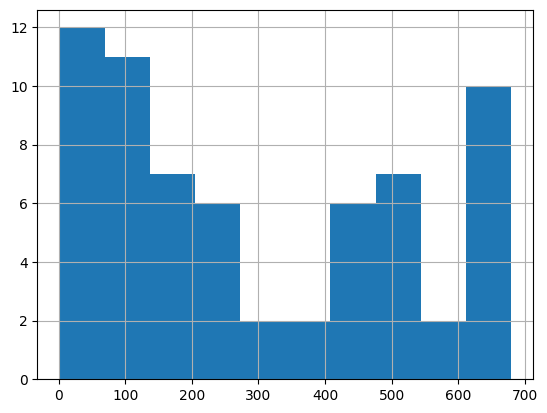

In [39]:
df_we_lt_679['Rank'].hist()

In [40]:
summary

,Metric,Count
0,Total WE (any rank),176
1,WE with rank < 679,65
